# Problem Statement : To Apply Naive Bias on Iris Dataset

# 1.Import Librearies

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# 2.Data Collection

In [59]:
df = pd.read_csv('E:/ML_Datasets/IRIS.csv')

In [60]:
df

sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

# EDA : Exploratory Data Analysis

# Check missing values

In [61]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Check histplot 

## histogram shows distribution of dataset

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

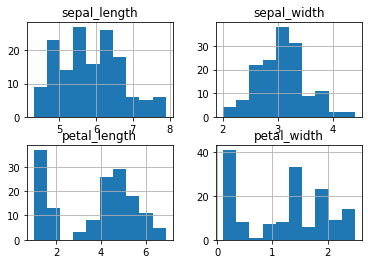

In [62]:
df.hist()

##  sepal_length

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

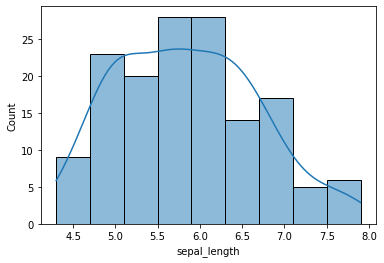

In [63]:
sns.histplot(df,x='sepal_length' , kde = True)

## sepal_width

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

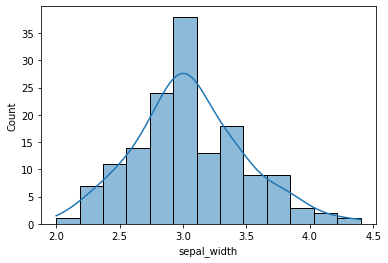

In [64]:
sns.histplot(df , x = 'sepal_width' , kde = True)

# Petal _length

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

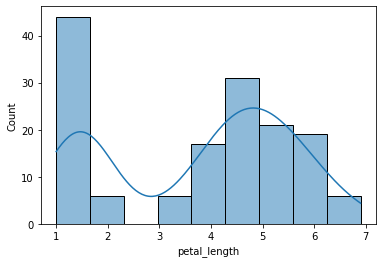

In [65]:
sns.histplot(df , x ='petal_length' , kde = True)

<AxesSubplot:xlabel='petal_width', ylabel='Count'>

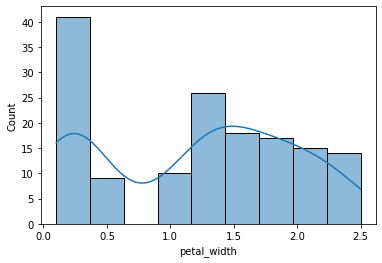

In [66]:
sns.histplot(df , x = 'petal_width' , kde = True)

# Describe : It is description of whole Dataset

In [67]:
df.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

# Paiplot : To plot relation in pairwise

# hue is map colors and skip the column which mentioned in hue

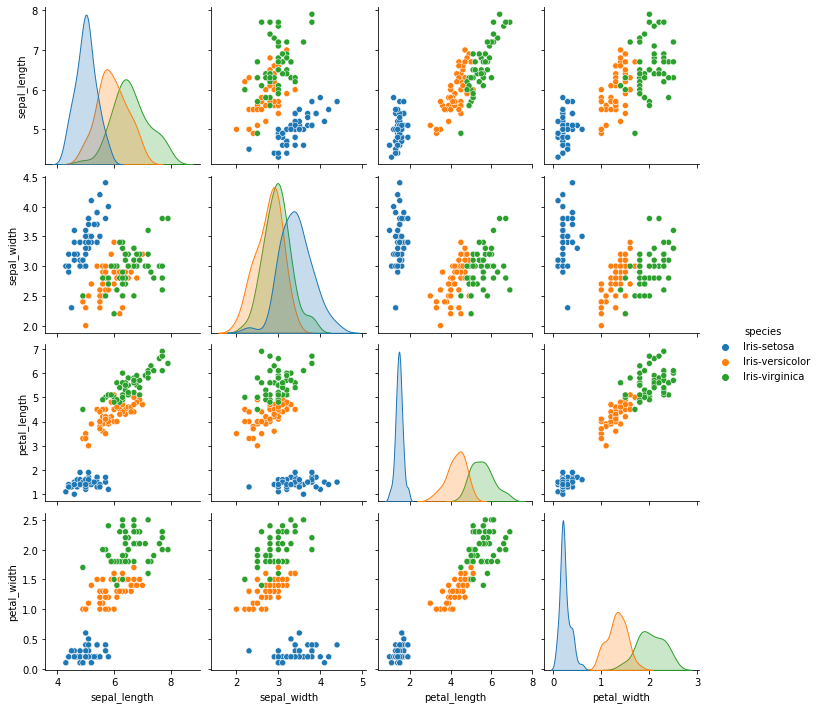

In [23]:
sns.pairplot(df , hue ='species' )

# Box plot

## Box plot is the showing distribution of dataset in five summeries like min , 25 % , 50% , 75%, max and it also shows outliers in the dataset

<AxesSubplot:>

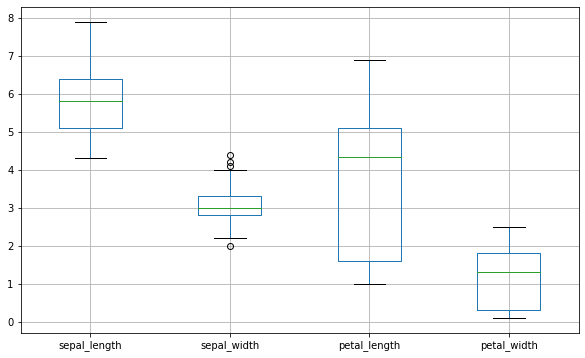

In [68]:
plt.figure(figsize =(10,6))
df.boxplot()

### Checking Outliers in sepal width

### How to treat with outliers

### 1.visualise

#### Visualise by boxplot

C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_width'>

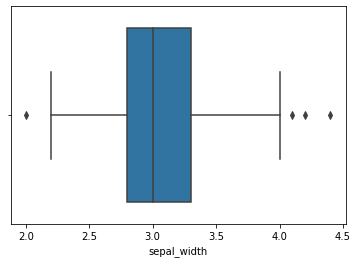

In [69]:
sns.boxplot(df['sepal_width'])

#### Visualise by histogram

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

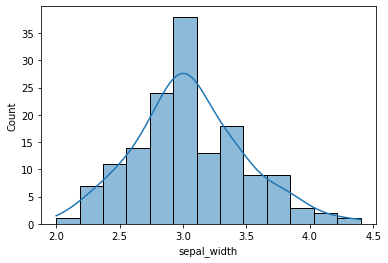

In [70]:
sns.histplot(df['sepal_width'] , kde = True)

### 2.Cheking skewness

#### Skewness is range between -1 t0 1 . if -1 then leftly skew . if +1 is rightly skew .

In [71]:
print('skewness of sepal width is' , df['sepal_width'].skew())

skewness of sepal width is 0.3340526621720866


### 3.IQR : Interquartile range

In [72]:
outliers = []
mean = np.mean(df['sepal_width'])
std = np.std(df['sepal_width'])



Q1 = np.percentile(df['sepal_width'] , 25 ,interpolation = 'midpoint')
Q2 = np.percentile(df['sepal_width'] , 50 , interpolation = 'midpoint')
Q3 = np.percentile(df['sepal_width'], 75 , interpolation = 'midpoint')


IQR = Q3 - Q1


whisker_width = 1.5

minimum = Q1 - (whisker_width * IQR)
maximum = Q3 + (whisker_width * IQR)

print('minimum value of sepal width is ' , minimum)
print('maximum value of petal width is ' , maximum)


# for i in df['sepal_width']:
#     if i > maximum or i < minimum :
#         outliers.append(i)
        
# print(outliers)



index = df['sepal_width'][(df['sepal_width'] > maximum) | (df['sepal_width'] < minimum)].index

print(index)


df.drop(labels = index , axis = 0 , inplace = True)

minimum value of sepal width is  2.05
maximum value of petal width is  4.05
Int64Index([15, 32, 33, 60], dtype='int64')


### Check boxplot after removing outliers

C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_width'>

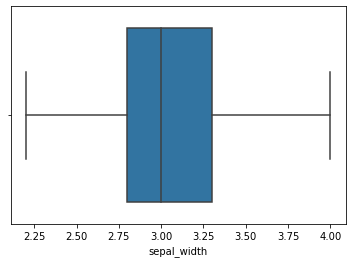

In [73]:
sns.boxplot(df['sepal_width'])

## We want remove  " Iris " string  so it is removed by three diffrent method , split , apply , replace . split and replace are the functions of string 

# split

In [74]:
df['species'].str.split('-', expand = True)[1]

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: 1, Length: 146, dtype: object

# replace

In [75]:
df['species'].str.replace('Iris-','')

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 146, dtype: object

# apply

In [76]:
df['species'].apply( lambda  x : x.split('-')[1])

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 146, dtype: object

In [77]:
df['species'].str.replace('Iris-','')

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 146, dtype: object

## We completed data preprocessing

# We split the data into independent and dependent variable

In [78]:
x = df.drop(columns = ['species'])
y = df['species'].str.split('-' , expand = True)[1]

In [79]:
x.head(1)

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2

In [80]:
y.head(1)

0    setosa
Name: 1, dtype: object

# Data split into train and test

In [81]:
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size = 0.2 , random_state = 42)

# Here we select the GaussianNB model because our features or input data in countinous data or float data

## Import GaussianNB model

In [82]:
from sklearn.naive_bayes import GaussianNB

In [83]:
model = GaussianNB()

## Fit the data

In [84]:
model.fit(x_train , y_train)

GaussianNB()

## Training accuracy

In [85]:
model.score(x_train, y_train)

0.9568965517241379

## Testing accuracy

In [86]:
model.score(x_test , y_test)

0.9333333333333333

## prediction output

In [87]:
y_pred = model.predict(x_test)

In [88]:
y_pred

array(['setosa', 'virginica', 'setosa', 'setosa', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'setosa'], dtype='<U10')

In [89]:
y_test

48         setosa
101     virginica
28         setosa
20         setosa
45         setosa
124     virginica
30         setosa
84     versicolor
70     versicolor
19         setosa
12         setosa
119     virginica
145     virginica
82     versicolor
141     virginica
39         setosa
64     versicolor
143     virginica
31         setosa
58     versicolor
100     virginica
126     virginica
11         setosa
71     versicolor
34         setosa
97     versicolor
68     versicolor
105     virginica
118     virginica
9          setosa
Name: 1, dtype: object

## Model accuracy

In [90]:
import sklearn
sklearn.metrics.accuracy_score(y_test , y_pred)

0.9333333333333333

## Performance_matrix or Evaluation_matrix or Cost function

In [91]:
from sklearn.metrics import confusion_matrix  , classification_report , accuracy_score , precision_score , f1_score , recall_score

In [92]:
cm = confusion_matrix(y_test , y_pred)

In [93]:
cm

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

Text(33.0, 0.5, 'Actual')

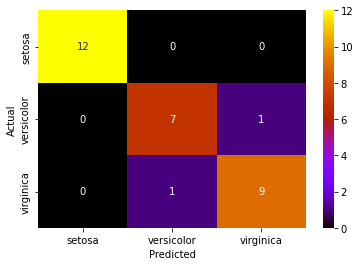

In [94]:
sns.heatmap(cm ,vmin=None,
    vmax=None,
    #cmap='BuPu',
    cmap ='gnuplot',
    center=None,
    robust=False,
    annot=True,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels=y.unique(),
    yticklabels=y.unique(),
    mask=None,
    ax=None)

plt.xlabel('Predicted')
plt.ylabel('Actual')

In [95]:
y_test.value_counts()

setosa        12
virginica     10
versicolor     8
Name: 1, dtype: int64

In [96]:
y_pred = pd.DataFrame(y_pred)

In [97]:
y_test.value_counts()

setosa        12
virginica     10
versicolor     8
Name: 1, dtype: int64

## Accuracy

In [98]:
accuracy_score(y_test , y_pred)

0.9333333333333333

## Precision_score

In [99]:
precision_score(y_test , y_pred , average = 'micro')

0.9333333333333333

In [100]:
recall_score(y_test , y_pred , average = 'micro')

0.9333333333333333

In [101]:
f1_score(y_test , y_pred , average = 'micro')

0.9333333333333333

In [102]:
precision_score(y_test , y_pred , average = 'weighted')

0.9333333333333333

In [103]:
recall_score (y_test , y_pred , average = 'weighted')

0.9333333333333333

In [104]:
f1_score(y_test , y_pred , average = 'weighted')

0.9333333333333333

In [105]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.88      0.88      0.88         8
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30

